# EDA: Insurance Claims Data (Task 1)
Initial exploration of the insurance dataset for AlphaCare Insurance Solutions. The goal is to uncover trends in risk and premium performance.

In [25]:
# import libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style='whitegrid')
plt.rcParams['figure.figsize'] = (12, 6)

In [26]:
# Load data
df = pd.read_csv("../data/raw/MachineLearningRating_v3.txt", delimiter='|', low_memory=False)
df.head()

,UnderwrittenCoverID,PolicyID,TransactionMonth,IsVATRegistered,Citizenship,LegalType,Title,Language,Bank,AccountType,...,ExcessSelected,CoverCategory,CoverType,CoverGroup,Section,Product,StatutoryClass,StatutoryRiskType,TotalPremium,TotalClaims
0,145249,12827,2015-03-01 00:00:00,True,,Close Corporation,Mr,English,First National Bank,Current account,...,Mobility - Windscreen,Windscreen,Windscreen,Comprehensive - Taxi,Motor Comprehensive,Mobility Metered Taxis: Monthly,Commercial,IFRS Constant,21.929825,0.0
1,145249,12827,2015-05-01 00:00:00,True,,Close Corporation,Mr,English,First National Bank,Current account,...,Mobility - Windscreen,Windscreen,Windscreen,Comprehensive - Taxi,Motor Comprehensive,Mobility Metered Taxis: Monthly,Commercial,IFRS Constant,21.929825,0.0
2,145249,12827,2015-07-01 00:00:00,True,,Close Corporation,Mr,English,First National Bank,Current account,...,Mobility - Windscreen,Windscreen,Windscreen,Comprehensive - Taxi,Motor Comprehensive,Mobility Metered Taxis: Monthly,Commercial,IFRS Constant,0.000000,0.0
3,145255,12827,2015-05-01 00:00:00,True,,Close Corporation,Mr,English,First National Bank,Current account,...,Mobility - Metered Taxis - R2000,Own damage,Own Damage,Comprehensive - Taxi,Motor Comprehensive,Mobility Metered Taxis: Monthly,Commercial,IFRS Constant,512.848070,0.0
4,145255,12827,2015-07-01 00:00:00,True,,Close Corporation,Mr,English,First National Bank,Current account,...,Mobility - Metered Taxis - R2000,Own damage,Own Damage,Comprehensive - Taxi,Motor Comprehensive,Mobility Metered Taxis: Monthly,Commercial,IFRS Constant,0.000000,0.0


In [27]:
# Dataset info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000098 entries, 0 to 1000097
Data columns (total 52 columns):
 #   Column                    Non-Null Count    Dtype  
---  ------                    --------------    -----  
 0   UnderwrittenCoverID       1000098 non-null  int64  
 1   PolicyID                  1000098 non-null  int64  
 2   TransactionMonth          1000098 non-null  object 
 3   IsVATRegistered           1000098 non-null  bool   
 4   Citizenship               1000098 non-null  object 
 5   LegalType                 1000098 non-null  object 
 6   Title                     1000098 non-null  object 
 7   Language                  1000098 non-null  object 
 8   Bank                      854137 non-null   object 
 9   AccountType               959866 non-null   object 
 10  MaritalStatus             991839 non-null   object 
 11  Gender                    990562 non-null   object 
 12  Country                   1000098 non-null  object 
 13  Province                  1

In [28]:
# summary statistics
df.describe()

,UnderwrittenCoverID,PolicyID,PostalCode,mmcode,RegistrationYear,Cylinders,cubiccapacity,kilowatts,NumberOfDoors,CustomValueEstimate,NumberOfVehiclesInFleet,SumInsured,CalculatedPremiumPerTerm,TotalPremium,TotalClaims
count,1.000098e+06,1.000098e+06,1.000098e+06,9.995460e+05,1.000098e+06,999546.000000,999546.000000,999546.000000,999546.000000,2.204560e+05,0.0,1.000098e+06,1.000098e+06,1.000098e+06,1.000098e+06
mean,1.048175e+05,7.956682e+03,3.020601e+03,5.487770e+07,2.010225e+03,4.046642,2466.743258,97.207919,4.019250,2.255311e+05,NaN,6.041727e+05,1.178757e+02,6.190550e+01,6.486119e+01
std,6.329371e+04,5.290039e+03,2.649854e+03,1.360381e+07,3.261391e+00,0.294020,442.800640,19.393256,0.468314,5.645157e+05,NaN,1.508332e+06,3.997017e+02,2.302845e+02,2.384075e+03
min,1.000000e+00,1.400000e+01,1.000000e+00,4.041200e+06,1.987000e+03,0.000000,0.000000,0.000000,0.000000,2.000000e+04,NaN,1.000000e-02,0.000000e+00,-7.825768e+02,-1.200241e+04
25%,5.514300e+04,4.500000e+03,8.270000e+02,6.005692e+07,2.008000e+03,4.000000,2237.000000,75.000000,4.000000,1.350000e+05,NaN,5.000000e+03,3.224800e+00,0.000000e+00,0.000000e+00
50%,9.408300e+04,7.071000e+03,2.000000e+03,6.005842e+07,2.011000e+03,4.000000,2694.000000,111.000000,4.000000,2.200000e+05,NaN,7.500000e+03,8.436900e+00,2.178333e+00,0.000000e+00
75%,1.391900e+05,1.107700e+04,4.180000e+03,6.005842e+07,2.013000e+03,4.000000,2694.000000,111.000000,4.000000,2.800000e+05,NaN,2.500000e+05,9.000000e+01,2.192982e+01,0.000000e+00
max,3.011750e+05,2.324600e+04,9.870000e+03,6.506535e+07,2.015000e+03,10.000000,12880.000000,309.000000,6.000000,2.655000e+07,NaN,1.263620e+07,7.442217e+04,6.528260e+04,3.930921e+05


In [29]:
# check missing values
df.isnull().sum().sort_values(ascending=False)

NumberOfVehiclesInFleet     1000098
CrossBorder                  999400
CustomValueEstimate          779642
Rebuilt                      641901
Converted                    641901
WrittenOff                   641901
NewVehicle                   153295
Bank                         145961
AccountType                   40232
Gender                         9536
MaritalStatus                  8259
VehicleType                     552
make                            552
mmcode                          552
Model                           552
Cylinders                       552
bodytype                        552
kilowatts                       552
NumberOfDoors                   552
VehicleIntroDate                552
cubiccapacity                   552
CapitalOutstanding                2
SubCrestaZone                     0
ItemType                          0
Province                          0
Country                           0
PostalCode                        0
MainCrestaZone              

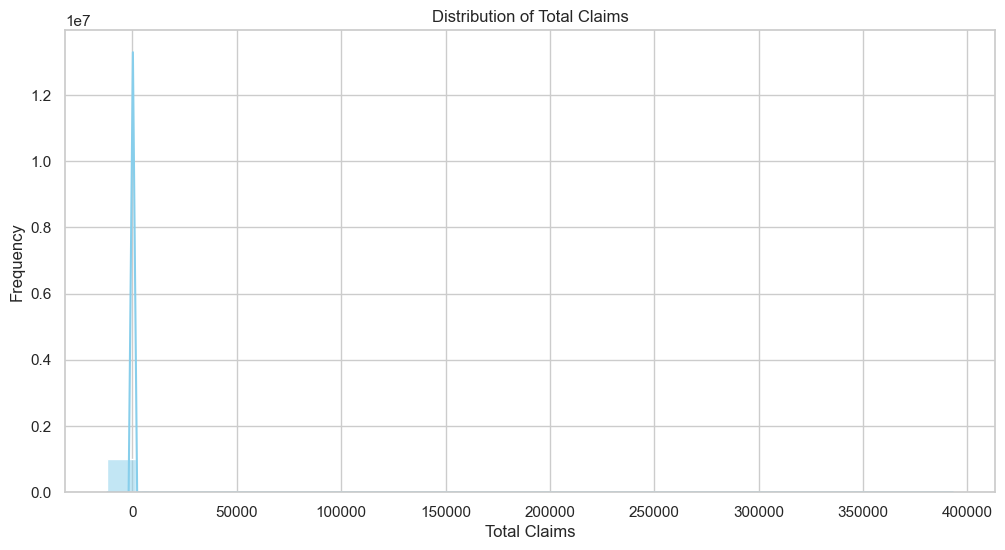

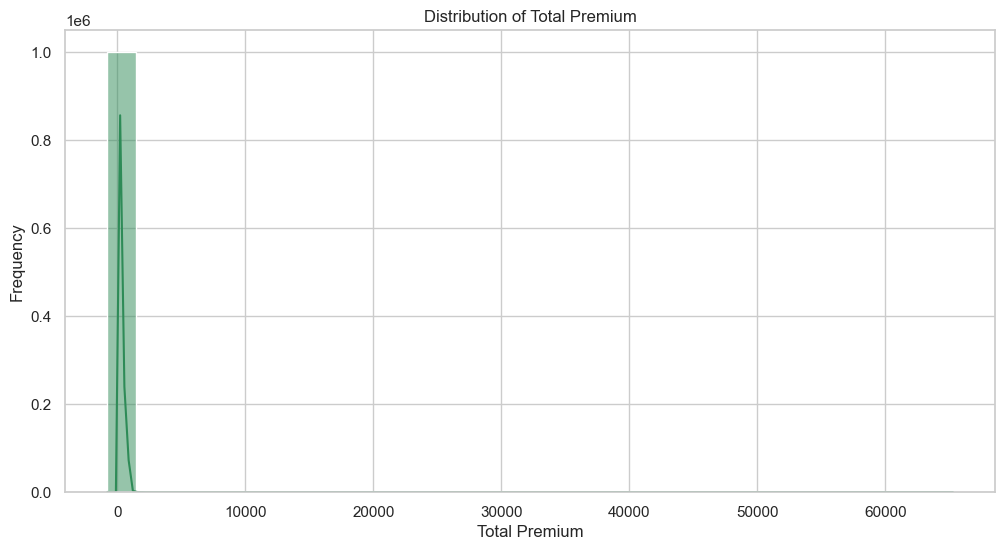

In [30]:
# Histogram for key financial variables
# Plot distribution of TotalClaims
sns.histplot(df['TotalClaims'], bins=30, kde=True, color="skyblue")
plt.title("Distribution of Total Claims")
plt.xlabel("Total Claims")
plt.ylabel("Frequency")
plt.grid(True)
plt.show()

# Plot distribution of TotalPremium
sns.histplot(df['TotalPremium'], bins=30, kde=True, color="seagreen")
plt.title("Distribution of Total Premium")
plt.xlabel("Total Premium")
plt.ylabel("Frequency")
plt.grid(True)
plt.show()

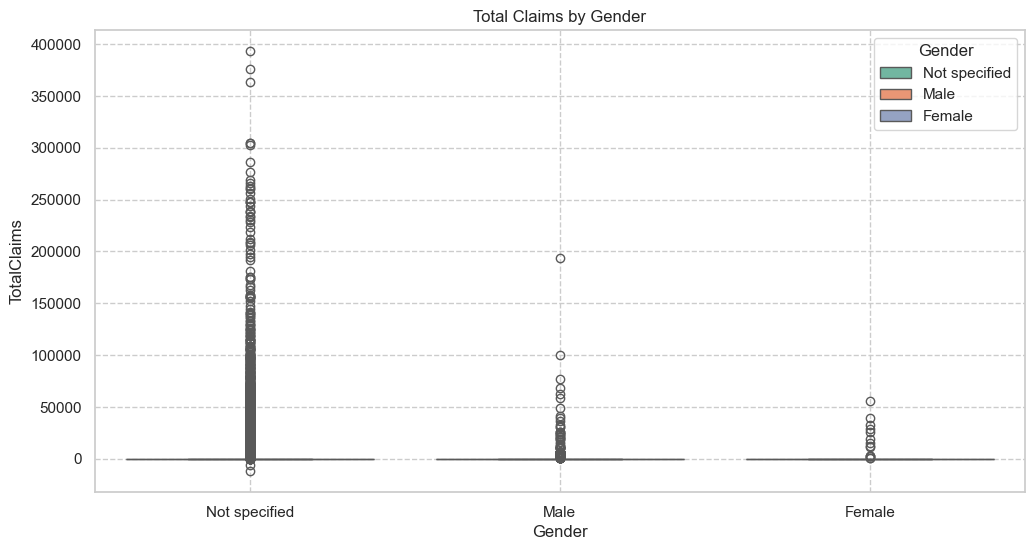

In [31]:
# Compare TotalClaims by Gender using boxplot
sns.boxplot(data=df, x='Gender', y='TotalClaims', hue='Gender', palette='Set2')
plt.title("Total Claims by Gender")
plt.grid(True, linestyle='--')
plt.show()

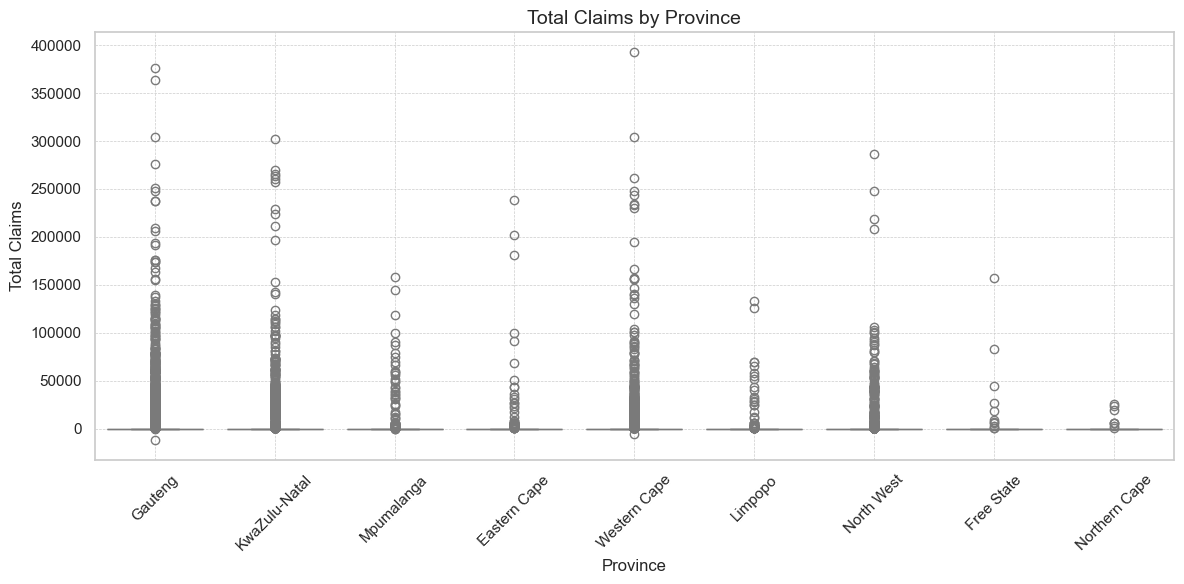

In [32]:
# Compare TotalClaims by Province using boxplot
sns.boxplot(data=df, x='Province', y='TotalClaims', hue='Province', palette='Pastel1')
plt.xticks(rotation=45)
plt.title("Total Claims by Province", fontsize=14)
plt.xlabel("Province")
plt.ylabel("Total Claims")
plt.grid(True, linestyle='--', linewidth=0.5)
plt.tight_layout()
plt.show()

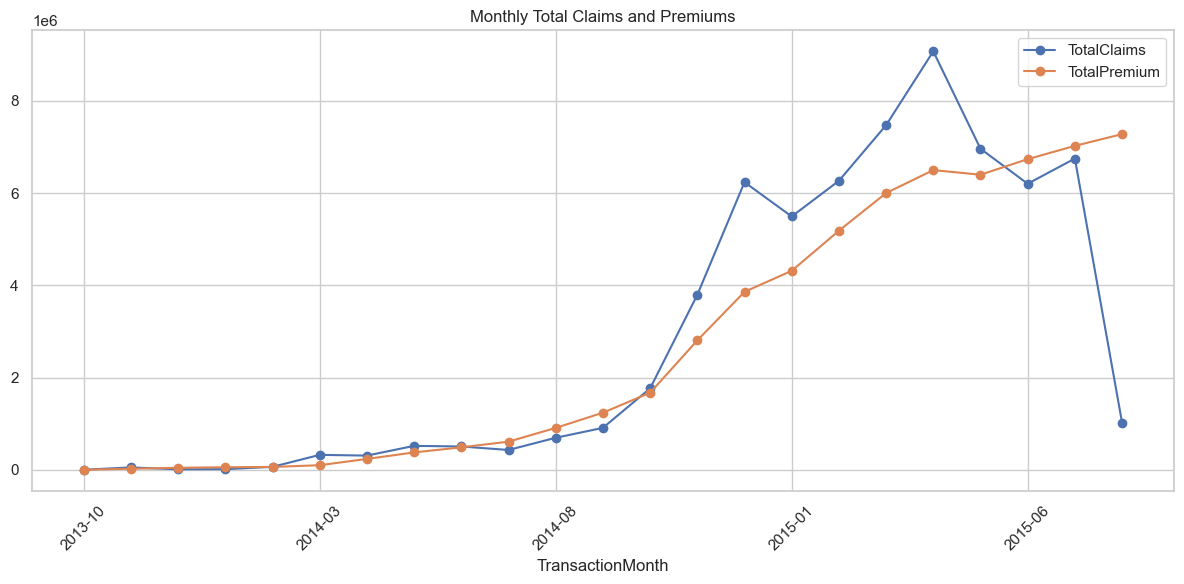

In [33]:
# Plot time trend
df['TransactionMonth'] = pd.to_datetime(df['TransactionMonth'], errors='coerce')

monthly = df.groupby(df['TransactionMonth'].dt.to_period("M")).agg({
    'TotalClaims': 'sum',
    'TotalPremium': 'sum'
}).reset_index()

monthly['TransactionMonth'] = monthly['TransactionMonth'].astype(str)

monthly.plot(x='TransactionMonth', y=['TotalClaims', 'TotalPremium'], kind='line', marker='o')
plt.xticks(rotation=45)
plt.title("Monthly Total Claims and Premiums")
plt.grid(True)
plt.tight_layout()
plt.show()

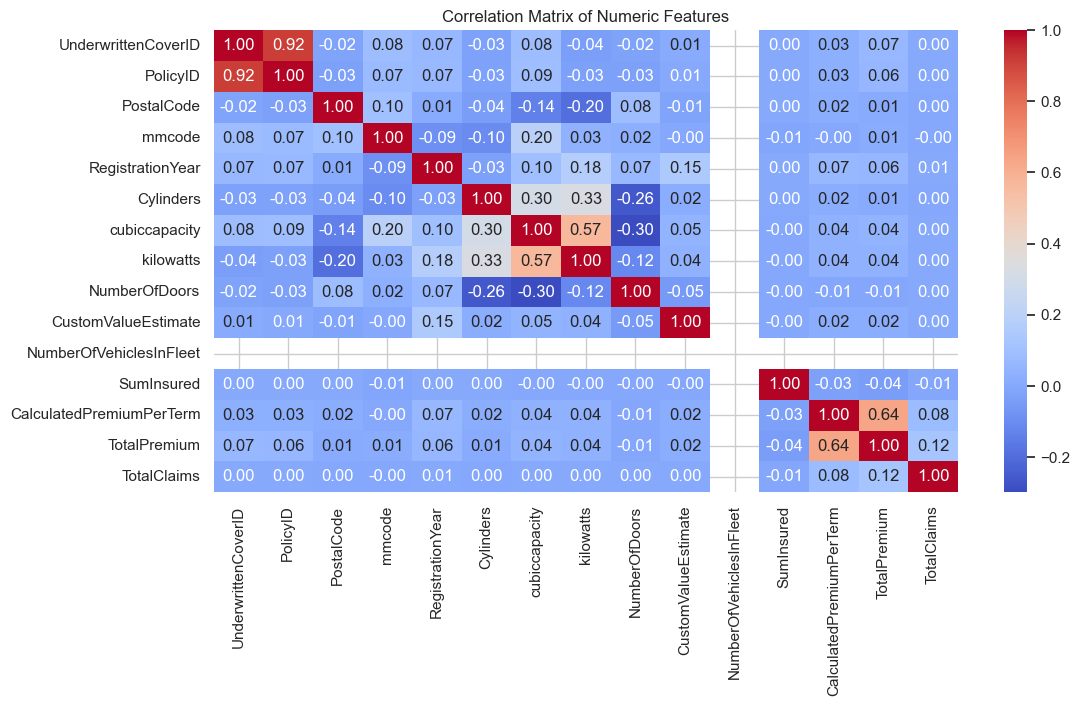

In [34]:
# correlatiob matrix
corr = df.select_dtypes(include='number').corr()
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f')
plt.title("Correlation Matrix of Numeric Features")
plt.show()

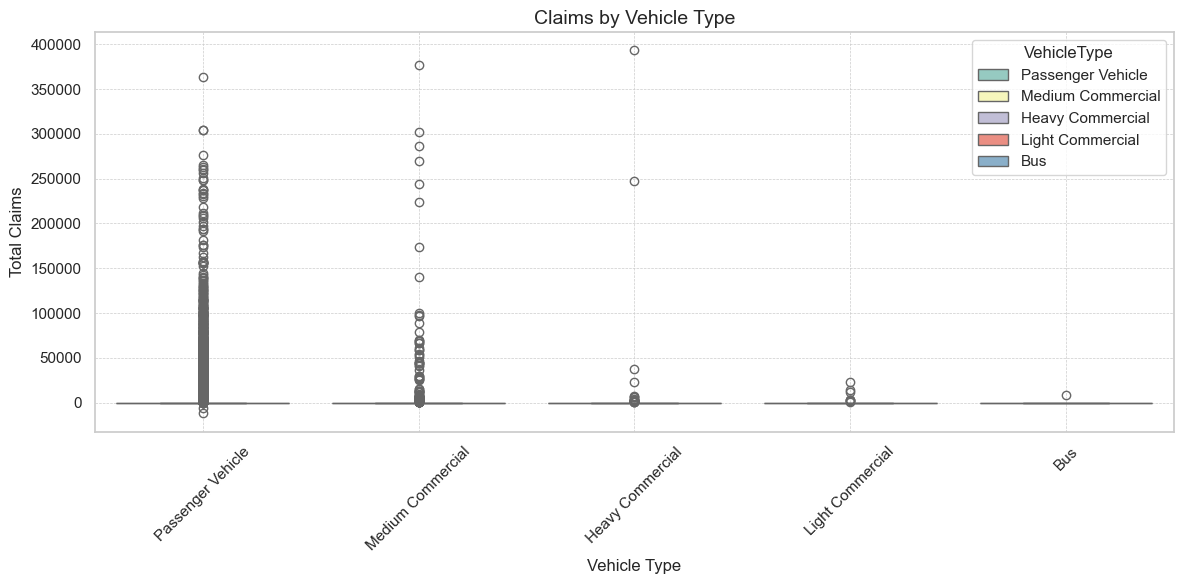

In [35]:
# Visualize TotalClaims distribution across vehicle types
sns.boxplot(data=df, x='VehicleType', y='TotalClaims', hue='VehicleType', palette='Set3')
plt.xticks(rotation=45)
plt.title("Claims by Vehicle Type", fontsize=14)
plt.xlabel("Vehicle Type")
plt.ylabel("Total Claims")
plt.grid(True, linestyle='--', linewidth=0.5)
plt.tight_layout()
plt.show()

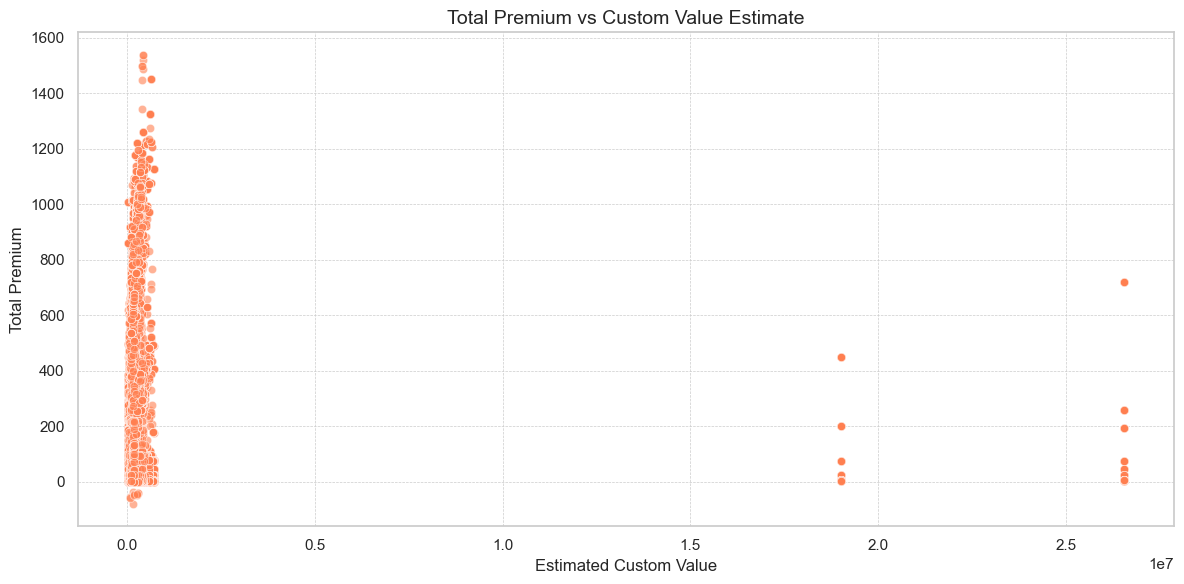

In [36]:
# PREMIUM VS Custom Value Estimate
# Scatter plot to show relation between vehicle value and premium charged
sns.scatterplot(data=df, x='CustomValueEstimate', y='TotalPremium', alpha=0.6, color="coral")
plt.title("Total Premium vs Custom Value Estimate", fontsize=14)
plt.xlabel("Estimated Custom Value")
plt.ylabel("Total Premium")
plt.grid(True, linestyle='--', linewidth=0.5)
plt.tight_layout()
plt.show()